# Chapter 03 Exercises

## Name goes here

### Date

In [100]:
# Libraries you will need for this assignment. The code below will import them for your use. Please run this before continuing.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


## Q1) Growth and Development with discrete compounding growth
In 2014, Ethiopia had a per capita income of $\$1500$, about $\$4$ per day. Compute per capita income in Ethiopia for the year 2050, assuming the average annual growth rates below.

*Hint:use the constant growth rate formula (3.7) on page 50 on your textbook to solve **(a)**. Then copy the formula for the next parts of this question, changing only the growth rate variable.*  

**(a)** 1% per year



In [19]:
def d_avg_growth(y0,g,t):
    '''
    This function calculates the discrete compounding growth formula
    
    Args:
        y_0: starting value
        g: growth rate
        t: elapsed time from starting and ending value
    Return:
        y_t: ending value
    '''
    yt = y0 * (1+g) ** t
    return yt

print('Per capital GDP Ethiopia 2050, 1% growth rate:', '${:,.2f}'.format(d_avg_growth(1500, 0.01,36)))

Per capital GDP Ethiopia 2050, 1% growth rate: $2,146.15


**(b)** 2% per year

In [21]:
print('Per capital GDP Ethiopia 2050, 2% growth rate:', '${:,.2f}'.format(d_avg_growth(1500, 0.02,36)))

Per capital GDP Ethiopia 2050, 1% growth rate: $3,059.83


**(c)** 4% per year.

In [22]:
print('Per capital GDP Ethiopia 2050, 4% growth rate:', '${:,.2f}'.format(d_avg_growth(1500, 0.04,36)))

Per capital GDP Ethiopia 2050, 1% growth rate: $6,155.90


**(d)** 6% per year.

In [23]:
print('Per capital GDP Ethiopia 2050, 6% growth rate:', '${:,.2f}'.format(d_avg_growth(1500, 0.06,36)))

Per capital GDP Ethiopia 2050, 6% growth rate: $12,220.88


## Q2) Population Growth with continuous compounding growth

Suppose the world population today is 7 bllion, and suppose this population grows at a constant rate of 3% per year from now on. 

**(a)** What would the world's population in 100 years from now?

In [62]:
def c_avg_growth(y0,g,t):
    '''
    This function calculates the continuous compounding growth formula
    
    Args:
        y_0: starting value
        g: growth rate
        t: elapsed time from starting and ending value
    Return:
        y_t: ending value
    '''
    yt = y0 * np.exp(t * g)
    return yt

print('World Population in 100 years, 3% growth rate, in billions:', '{:,.2f}'.format(c_avg_growth(7, 0.03,100)))

World Population in 100 years, 3% growth rate, in billions: 140.60


**(b)** Compute the level of the population for $t=0$, $t=1$, $t=2$, $t=10$, $t=25$, $t=50$ 

*Hint: You can use array operations to compute all these values simultaneously.*

In [89]:
t=np.array([1, 2, 10, 25, 50])
pop=c_avg_growth(7, 0.03, t)

# Making the arrays into a data frame so it would look like a table when using print()
data = pd.DataFrame({'Period': t,
                    'Population': pop}, 
                    columns = ['Period', 'Population'])
print(data)

   Period  Population
0       1    7.213182
1       2    7.432856
2      10    9.449012
3      25   14.819000
4      50   31.371823


**(c)** Make a time series plot of population versus time on a standard scale.

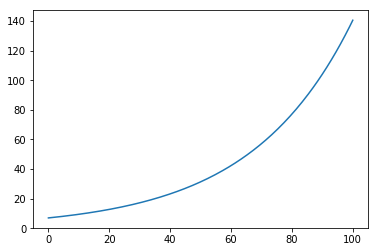

In [64]:
t=np.linspace(0,100,200) #creates an array starting a 0 until 100, with 200 equidistant values.

plt.plot(t,c_avg_growth(7,0.03,t))

**(d)** Make a time series plot of population versus time on a ratio scale.

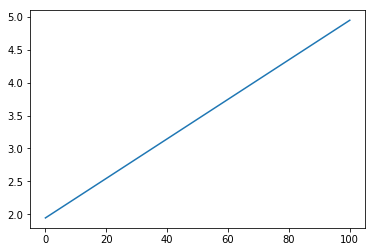

In [66]:
t=np.linspace(0,100,200)

plt.plot(t,np.log(c_avg_growth(7,0.03,t)))

# Notice that the scale of the y axis is values of Ln(pop). 

## Q3) Computing levels: 

__a)__ Suppose $x_t$ grows at 2% per year and $y_t$ grows at 5% per year with $x_o = 2$ and $y_o = 1$. Calculate the numerical values of $z = x^{3/4}y^{1/4}$ for $t = 0, \ t = 2,  \ t = 10, \ t = 17$, and $t = 35$.

In [86]:
t=np.array([0, 2, 10, 17, 35])
def z_fun(x_0, y_0, g_x, g_y, t):
    '''
    This function calculates the values of z = x^{3/4}*y^{1/4}
    
    Args:
        x_0: starting value for x
        y_0: starting value for 7
        g_x: growth rate of x
        g_y: growth rate of y
        t: elapsed time from starting and ending value
    Return:
        z: function evaluated at input values
    '''
    
    z = (x_0 * np.exp(t * g_x)) ** (3 / 4) * (y_0 * np.exp(t * g_y)) ** (1 / 4) 
    return z

# Parameters
x_0 = 2
y_0 = 1
g_x = 0.02
g_y = 0.05


z = z_fun(x_0, y_0, g_x, g_y, t)

# Making arrays into a data frame for better presentation when using print()
data = pd.DataFrame({'Period': t,
                    'z': z}, 
                    columns = ['Period', 'z'])
print(data)


   Period         z
0       0  1.681793
1       2  1.776882
2      10  2.214132
3      17  2.684140
4      35  4.403327


__b)__ Calculate the growth rate of $z$ numericaly using the continuous compounding growth formula.

In [87]:
g_z=np.log(z[-1] / z[0]) / 35
print('Growth Rate of z:', '{0:.2%}'.format(g_z))

Growth Rate of z: 2.75%


__c)__ Could you have found the answer in an easier way? How?

Yes, I could use the percentage/growth rates transformation for this function.

In [88]:
g_z_better=3/4 * g_x + 1/4 * g_y
print('Growth Rate of z:', '{0:.2%}'.format(g_z_better))

Growth Rate of z: 2.75%


## Q4) Growh rates of per capita GDP:

**(a)** Compute the average annual growth rate of per capita GDP for each of the countries listed below. The levels of GDP per capital are provided for 1980 and 2014, measured in constant 2011 dollars. 

*Hint: We will use formula (3.9) on page 54 of your textbook. The comments in the input field below will guide you through this exercise.*


In [6]:
# The following are lists containing the information described above.

names=['United States','Canada','France','United Kingdom','Italy','Germany','Japan','Ireland','Mexico','Brazil','Indonesia','Kenya','China','India','Ethiopia']
GDP_1980=[29288, 24716, 22557, 20044, 19912, 19617, 19147, 12845, 11954, 5297, 2249, 2049, 1578, 1196, 690]
GDP_2014=[51958, 43376, 37360, 38083, 34876, 45320, 35574, 52186, 15521, 17459, 9797, 2971, 12514, 5451, 1505]


#Step 1: Turn these pre-defined lists into a dictionary called "gdp_dictionary"

#Solution:
gdp_dictionary={
    'country':names,
    'GDP_1980':GDP_1980,
    'GDP_2014':GDP_2014
    }


#Step2: Convert your GDP dictionary into a DataFrame called "gdp_df"

#Solution:
gdp_df=pd.DataFrame(gdp_dictionary)

# Use a custom function to calculate the average growth rate of GDP between 1980 and 2014 for all the countries at the same time.
# Append you calculated field as another column on the "gdp_df" dataframe.


def avg_growth(row): 
    '''
    Calculates the average rate of growth for each row or column in a dataframe simultaneously.
    Arguments:
    direction:"row" defines the function to operate horizontally on our DataFrame, across rows;
              "col" performs the operation over the DataFrame's columns
    Returns:
    Discrete compounding average growth rate between X_(t+n) and X_(t)
    '''    
    return ((row['GDP_2014'] / row['GDP_1980']) ** (1 / 34) - 1) * 100

gdp_df['avg_growth']=gdp_df.apply(avg_growth,axis=1)


#Step 3: Print your ouput

print(gdp_df)



           country  GDP_1980  GDP_2014  avg_growth
0    United States     29288     51958    1.700347
1           Canada     24716     43376    1.668040
2           France     22557     37360    1.495052
3   United Kingdom     20044     38083    1.905690
4            Italy     19912     34876    1.662122
5          Germany     19617     45320    2.493377
6            Japan     19147     35574    1.838667
7          Ireland     12845     52186    4.209297
8           Mexico     11954     15521    0.770980
9           Brazil      5297     17459    3.570240
10       Indonesia      2249      9797    4.423240
11           Kenya      2049      2971    1.098777
12           China      1578     12514    6.279544
13           India      1196      5451    4.562234
14        Ethiopia       690      1505    2.320203


**(b)** In part **(a)** you found the average growth rates for various countries. Do you think that there are some growth rates that are more common than others? Create a histogram and find out!

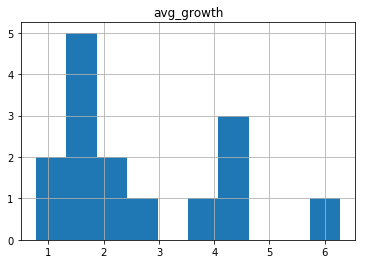

In [7]:
# Hint: you can directly plot a histogram from the DataFrame if you don't want a lot of customization (google it!). 
#Otherwise you can use "matplotlib.pyplot.hist"

hist=gdp_df.hist(column='avg_growth')

## Q5) Practice Charting in Python

a) The code below will walk you through importing data on Amazon's (AMZN) stock price over time. Create a time series plot of the stock price with time on the x-axis and price on the y-axis. Don't forget to make the graph look professional by including a proper lables, title, and some color to the data being plotted.

*Hint: If you need a reminder on how to use Matplotlib, please see the DataCamp course "Intermediate Python for Data Science" section 1, or the Python Guide on Matplotlib on I-learn.*

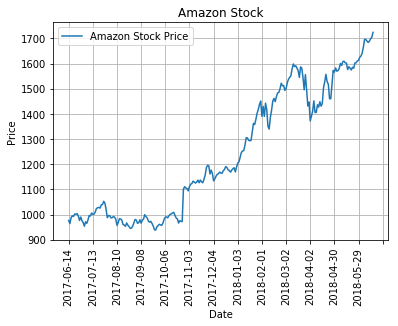

In [109]:
# Step 1: Import the data from Git Hub 

amzn = pd.read_csv('https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/AMZN.csv')

# Step 2: Create x and y axis variables for plotting.

date = amzn["Date"]
price = amzn["Close"]

# Note: each variable is an array. You can use any of the array tools you learned in DataCamp.

# Step 3: Insert your code below to make the time series plot using Python's Matplotlib.

# Defining the plot
ax = plt.subplot()
ax.plot(date, price, label = 'Amazon Stock Price')

#styling; labels and titles
ax.set(xlabel = 'Date',
      ylabel = 'Price',
      title = 'Amazon Stock')
ax.grid()

# definition of intervals (ticks)
tick_date = 20 # spacing between observations for each tick. Higher number, less ticks.
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_date)) 

ax.legend()
plt.xticks(rotation=90) # rotates x-axis ticks to show them verticaly
plt.show()




b) The constant growth rate formula (both discrete and continuous) we have used throughout this assignment has many uses and different names. This same formula is used in Finance to calculate average returns for a miriad of assets. Let's use the discrete version of the formula to compute an average percent return for Amazon's stock prices during the time period we have data. You will use exactly the same formula from Q4 part (a), taking the first observation in "price" as $y_0$ and the last observation as $y_t$. Make sure that you calculate $t$ in years.


In [110]:
# Step 1: locate the first and last observations of the "price" array, store them as numpy array variables "y_"0 and "y_t"

#Solution:
p=np.array(price)
y_0=p[0]
y_t=p[-1]

#Step 2: calculate how many years have passed between the first and last observations in the "date" array corresponding 
#to our price observations. 

#Possible Solution: Use the datetime64 data type.

#Explanation:

#convert the dates to a numpy array. You can't use the location extraction functions that follow otherwise.
date_num=np.array(date,dtype=np.datetime64)

d_t=date_num[-1] #extract last observation from the array
d_0=date_num[0] #extract first observation from the array

#calculate difference between observations in years
t_date=np.datetime64(d_t,'Y') - np.datetime64(d_0,'Y') 
# Note: You have to use np.datetime64(value,'Y') so that your calculation returns the number of years between the two dates. 
# You could also use 'M' or 'D' after the comma if you need to find the number of months or days respectively.

# convert the output t_date to integers so that you can perform arithmetic operators. The output t_date is currently in the
# '<m8[Y]' data type, not 'int'.

t=int(t_date) 

#Step 3: Use formula (3.9) in page 54 of the textbook.

r = ((y_t / y_0) ** (1 / t) - 1)

#Step 4: Print your output!

print('Average Yearly Percentage Return:', '{0:.2%}'.format(r))


Average Yearly Percentage Return: 76.54%
